In [6]:
from datetime import datetime
from IPython.display import Markdown as md
from IPython.display import display_markdown

todays_date = str(datetime.now().date())
month = datetime.now().strftime("%B")
year = str(datetime.now().year)

import sys
import os
sys.path.append(os.path.abspath('../utils/'))
from shared_functions import get_year_and_month, get_month_name

year, month = get_year_and_month()
month_name = get_month_name(month)

# An Overview

## The NBS project

The European Space Agency (ESA) is in charge for the distribution of data from the Sentinel satellite constellation. In order to maintain a reliable and sustainable data hub, the creation and operation of multiples data hubs is necessary. With the purpose of keeping and maintaining a reliable and online source of data from the ESA Sentinel constellation for an Area Of Interest (AOI) covering Norway, the Norwegian Space Agency (NOSA) funded the National Bakke Segment (NBS) project. The map below is indicating the AOI in red.  

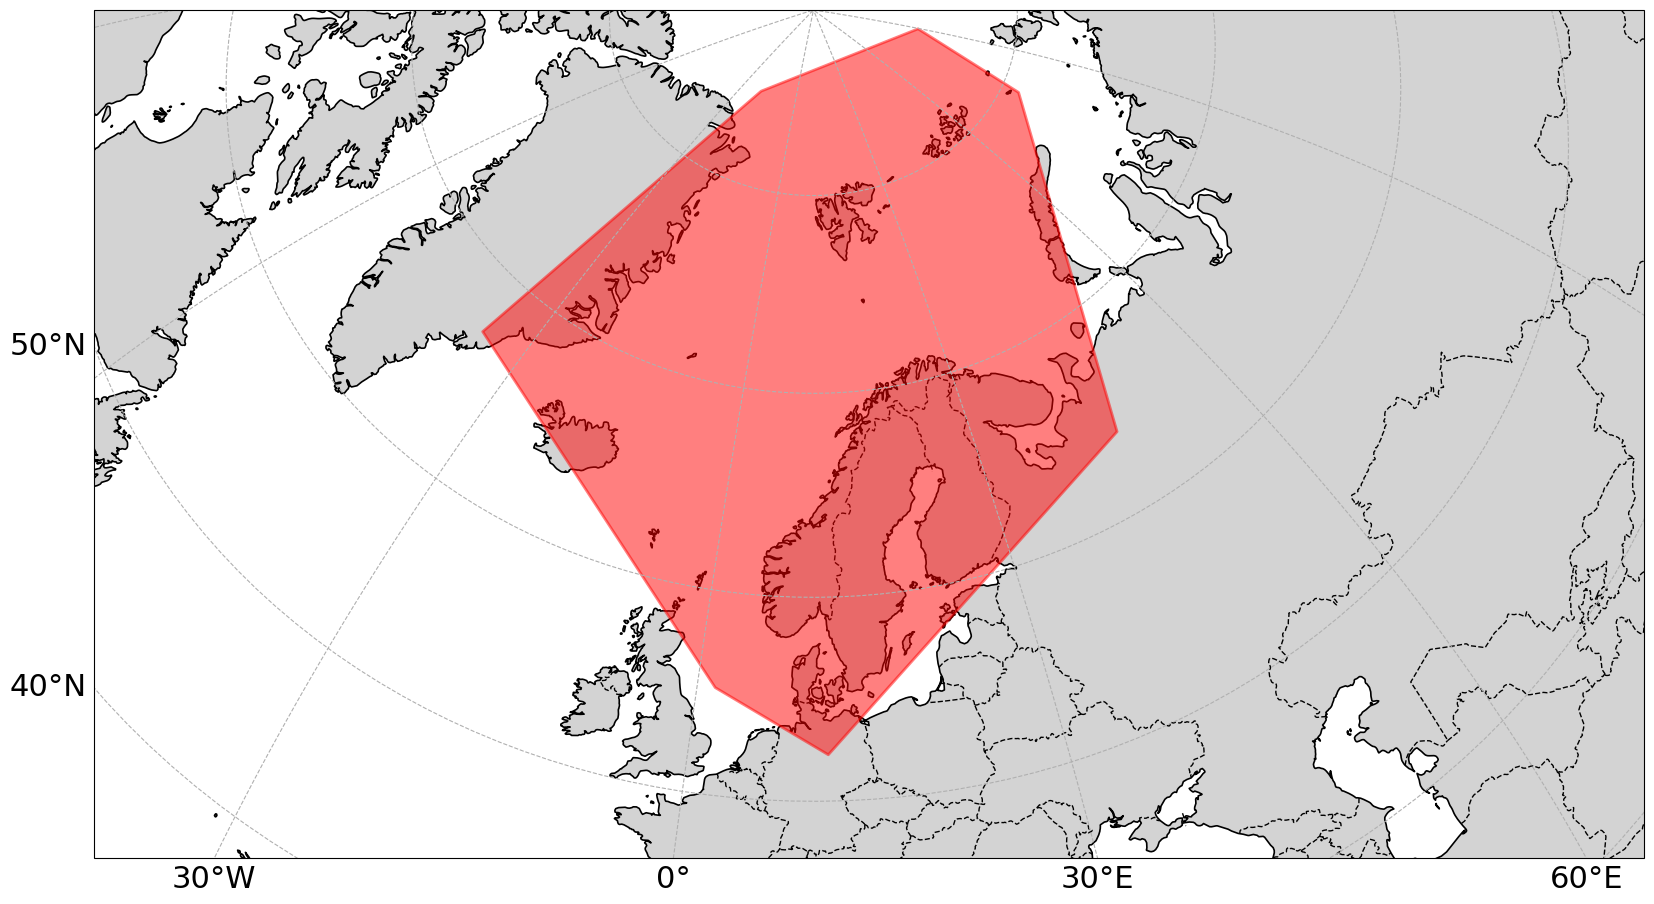

In [2]:
from shapely.geometry.polygon import Polygon
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

plt.rcParams["figure.figsize"] = (20, 15)
plt.rcParams.update({'font.size': 22})

# Define the polygon coordinates
polygon = Polygon([(-20.263238824222373, 84.8852877777822),
                   (-36.25445787748578, 67.02581594412311), 
                   (11.148084316116405, 52.31593720759386), 
                   (45.98609725358305, 63.94940066151824), 
                   (89.96194965005743, 84.8341192704811), 
                   (-20.263238824222373, 84.8852877777822),
                   (-20.263238824222373, 84.8852877777822)])

# Create the plot
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=10.0, central_latitude=60.0))
ax.set_global()  # Display the entire globe

# Set the extent (latitude and longitude bounds)
ax.set_extent([-50, 100, 45, 90], crs=ccrs.PlateCarree())

# Add geographical features
ax.add_feature(cfeature.LAND.with_scale('50m'), edgecolor='black', linewidth=1.2,facecolor='lightgray', zorder=0)
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linestyle='--', linewidth=1)

# Add the polygon 
ax.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor='red', edgecolor='red', alpha=0.5, linewidth=2)

# Add gridlines with labels
gridlines = ax.gridlines(draw_labels=True, linestyle='--', linewidth=0.8)
gridlines.top_labels = False
gridlines.right_labels = False
gridlines.xformatter = LONGITUDE_FORMATTER
gridlines.yformatter = LATITUDE_FORMATTER

plt.show()

Therefore, MET Norway was contracted for the operation of the NBS data. The NBS is implemented as a part of the operational infrastructure at MET Norway. As so it follows the normal procedures for planning, implementation and testing, and operations. User access to the NBS is configured according to NOSA requirements. This includes the use of ESA’s DHuS software for synchronization between ESA and user accessibility.

The present report is part of MET Norway duties to inform about its performance as operator of the NBS. Monthly reports will be created monthly to regularly communicate the status of MET Norway’s NBS.  

## The Sentinel products

The NBS project includes the management of the data received from Sentinel-1 (S1), Sentinel-2, Sentinel-3 (S3) and Sentinel-5p (S5p) satellites for the specified AOI. Each of the Sentinels has different operational modes for achieving images with different characteristics. Those images can have different processing levels. The products included in the DHR are Level-1 images for all the Sentinels except for Sentinel-2. For which Level-1 (S2L1C) and Level-2 (S2L2A) are both included in the NBS.

## BackEnds and FrontEnds

As operator of NBS, the source of Sentinel data is ESA; and ESA spreads the Sentinel data through the Copernicus Data Space Ecosystem (CDSE - dataspace.copernicus.eu). CDSE is ESA’s FrontEnd (FE) for Sentinel data accessibility. MET Norway uses the DHS software for synchronization and creation of other FrontEnds. During the synchronization process a BackEnd (BE) is created. MET Norway is also running two FEs, colhub.met.no and colhub-archive.met.no. The colhub FE includes or will include all the products mentioned for Sentinel global products plus S3 marine products from Copernicus, S1 products from the Kongsberg Satellite Services (KSAT), and S2 Digital Elevation Model (DEM). The colhub-archive FE includes data from S1, S2L1C, S2L2A, S2DEM, S3, S5p products for the AOI. An important distinction between both FEs is that colhub-archive will always maintain available online all the products for the AOI.  
 
In order to maintain an accountability on products synchronized from ESA’s CDSE and available for users at the different FEs, it is necessary to understand the architecture of MET Norway’s DHR.